In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/ML Case Study - Data.csv")

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container {width : 98% !important; }</style>"))
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,10]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
from scipy import stats
from sklearn import metrics

In [6]:
import yellowbrick as yb

#Checking Data Types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Statistical Summary

In [8]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [9]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [10]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file("profile.html")

# Checking for Null Values
### There were none


In [11]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Checking For Incorrect Values

In [12]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


### Incorrect values are in experience as it connot be negative

In [13]:
for i,k in enumerate(data["Experience"]):
    if k < 0:
        data["Experience"][i] = 0

In [14]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Corrected the Experience Values

In [15]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.12,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.44,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,0.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


# Unique value in each column

In [16]:
for i in list( data.columns):
    print(i,data[i].nunique())

ID 5000
Age 45
Experience 44
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2


# Number Of People with 0 Mortgage

In [17]:
(data["Mortgage"] == 0).sum()

3462

# Number of people 0 credit card spending

In [18]:
(data["CCAvg"] == 0).sum()

106

In [19]:
data.drop("ID", axis = 1, inplace= True)

In [20]:
data.drop("ZIP Code", axis = 1, inplace= True)

#Covariance Among Varaibles
As we know, age and experience are highly correlated same conclusion can be drawn from the data.

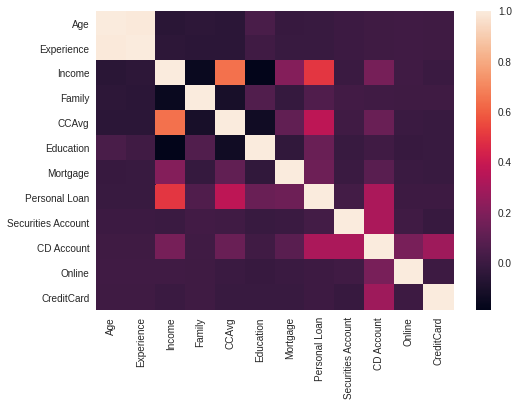

In [66]:
sns.heatmap(data.corr())

# Value Counts of diffrent categorical variable

In [21]:
for i in list(  ['Family',
       'Education',  'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']):
    print(data[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



In [22]:
pd.pivot_table(data , values="Personal Loan", index = "Family",columns="Education", aggfunc="sum")

Education,1,2,3
Family,,,
1,9,40,58
2,4,50,52
3,40,44,49
4,40,48,46


### Can be seen than that as the family and and education grows the number of people that go for personal loans have increased

# Data Preproceesing

In [23]:
    x = data.loc[:,['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
        'Mortgage', 'Securities Account', 'CD Account',
        'Online', 'CreditCard']]
    y = data["Personal Loan"]
    print(x.shape,y.shape)

(5000, 11) (5000,)


In [24]:
dic = {0:0,1:1}
for k in y:
    dic[k] +=1
# temp = dic[0]
# dic[0] = dic[1]
# dic[1] = temp

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(x,y,test_size = 0.3,random_state=7)

#P values Of features


In [73]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
reg2 = sm.OLS(Y_train, X2).fit()

In [74]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal Loan   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:52:30   Log-Likelihood:                 137.81
No. Observations:                3500   AIC:                            -251.6
Df Residuals:                    3488   BIC:                            -177.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2806      0.083     -3.378      0.001      -0.443      -0.118
Age                   -0.0042      0.003     -1.258      0.209      -0.011       0.002
Experience             0.0048      0.003      1.447      0.148      -0.002       0.011
Income                 0.0028      0.000     24.459      0.000       0.003       0.003
Family                 0.0360      0.003     10.343      0.000       0.029       0.043
CCAvg                  0.0171      0.003      5.810      0.000       0.011       0.023
Education              0.0800      0.005     16.181      0.000       0.070       0.090
Mortgage             9.02e-05   3.89e-05      2.320      0.020     1.4e-05       0.000
Securities Account    -0.0533      0.014     -3.856      0.000      -0.080      -0.026
CD Account             0.3330      0.019     17.094      0.000       0.295       0.371
Online                -0.0211      0.008     -2.584      0.010      -0.037      -0.005
CreditCard            -0.0462      0.009     -5.089      0.000      -0.064      -0.028
==============================================================================
Omnibus:                      931.600   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2471.311
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                       5.983   Cond. No.                     2.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# First Model Logistic Regression 

In [49]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
lg_reg = LogisticRegression(max_iter =100000,class_weight=dic)
lg_reg.fit(X_train, Y_train)
print("test_accuracy",lg_reg.score(X_test,Y_test))
print("train_accuracy",lg_reg.score(X_train,Y_train))

test_accuracy 0.944
train_accuracy 0.9382857142857143


In [27]:
y_pred = lg_reg.predict(X_test)

0.944

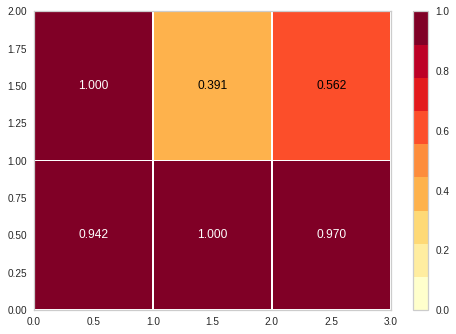

In [28]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(lg_reg)
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)


In [29]:
lg_reg.get_params()

{'C': 1.0,
 'class_weight': {0: 4520, 1: 481},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[1362,    0],
       [  84,   54]])

#Performance Metrics
### We choose ***f1_score*** as the evaluation matric due to the class size imbalance. 1 are 481 and 0 are 4520.
Metrics from http://onlineconfusionmatrix.com/

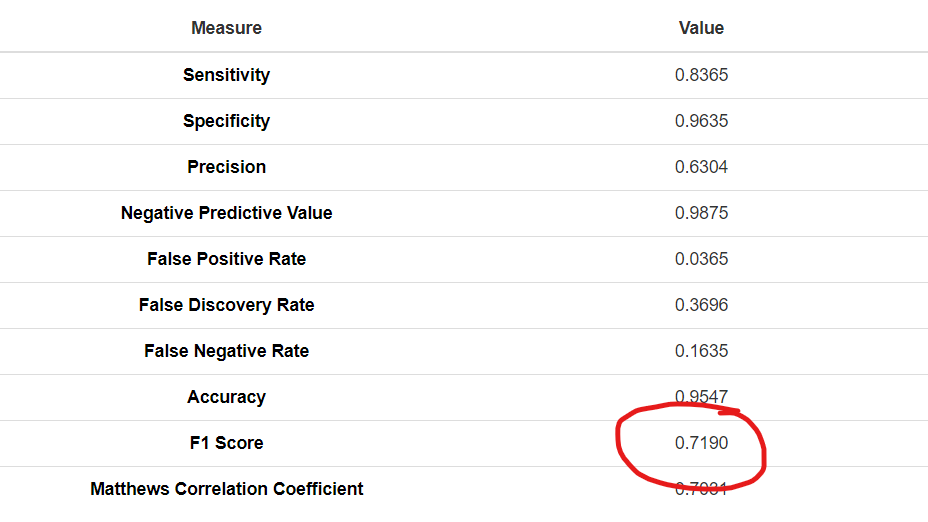

# Tweaking Hyperparameters
Since the most there is a imbalance in the number of dataset of each class.

In [31]:
from sklearn.metrics import f1_score
Lr_rate = [0.001,0.01,0.1,0.3,0.9,1.0,3,10.0]
for i in Lr_rate:
    lg_reg = LogisticRegression(C = i,max_iter =1000,class_weight="balanced")
    lg_reg.fit(X_train, Y_train)
    Y_pred = lg_reg.predict(X_test)
    print(f1_score(Y_test,Y_pred),"C =" + str(i))

0.5617977528089888 C =0.001
0.5794392523364487 C =0.01
0.5975903614457831 C =0.1
0.5980861244019139 C =0.3
0.6024096385542169 C =0.9
0.6038647342995169 C =1.0
0.6038647342995169 C =3
0.6024096385542169 C =10.0


#Ways To Improving our model 
###Since there are 5 categorical variables in  the data using **Random Forest** and **descision trees** classifiers make more sense. But we will work our way upto it.

# SVM Based Classifier

In [32]:
from sklearn.svm import SVC
Spvm = SVC(kernel = "poly",class_weight=dic)
Spvm.fit(X_train,Y_train)
Spvm.score(X_test,Y_test)      

0.9566666666666667

0.6948356807511737

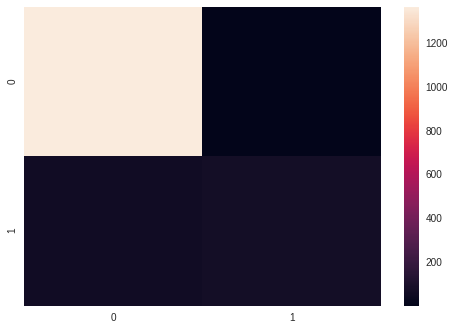

In [33]:
Y_pred = Spvm.predict(X_test)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,Y_pred))
f1_score(Y_test,Y_pred)

#Decision Tree Classifier
As predicted we get a lot better prediction scores.

In [50]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()
Dt.fit(X_train,Y_train)
print(Dt.score(X_test,Y_test))
Y_pred = Dt.predict(X_test)
f1_score(Y_test,Y_pred)

0.9833333333333333


0.9110320284697508

[[1347   15]
 [  10  128]]


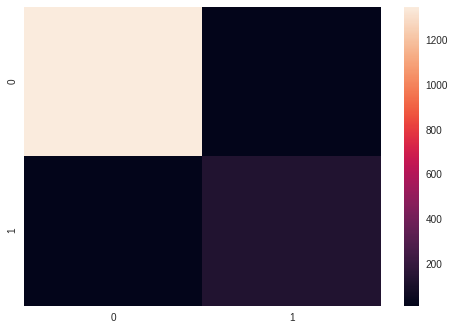

In [51]:
Y_pred = Dt.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred))

In [58]:
from sklearn import tree
import graphviz 
dt_data = tree.export_graphviz(Dt, out_file=None) 
graph = graphviz.Source(dt_data) 
graph.render("iris")
tree.export_graphviz(Dt, out_file=None, 
                   feature_names=x.columns,  
                    class_names = "Personal Loan",                        filled=True, rounded=True,  
                      special_characters=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<Income &le; 100.5<br/>gini = 0.176<br/>samples = 3500<br/>value = [3158, 342]<br/>class = P>, fillcolor="#e88f4e"] ;\n1 [label=<CCAvg &le; 2.95<br/>gini = 0.023<br/>samples = 2638<br/>value = [2607, 31]<br/>class = P>, fillcolor="#e5823b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<gini = 0.0<br/>samples = 2472<br/>value = [2472, 0]<br/>class = P>, fillcolor="#e58139"] ;\n1 -> 2 ;\n3 [label=<CD Account &le; 0.5<br/>gini = 0.304<br/>samples = 166<br/>value = [135, 31]<br/>class = P>, fillcolor="#eb9e66"] ;\n1 -> 3 ;\n4 [label=<Income &le; 98.5<br/>gini = 0.242<br/>samples = 156<br/>value = [134, 22]<br/>class = P>, fillcolor="#e9965a"] ;\n3 -> 4 ;\n5 [label=<Age &le; 26.5<br/>gini = 0.206<br/>samples = 146<br/>value = [129, 17]<br/>class = P>, fillcolor="#e89253"] ;\n4 -> 5 ;\n6 [label=<Income &le; 90.5<br/>gini = 0.444<

In [60]:
x.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

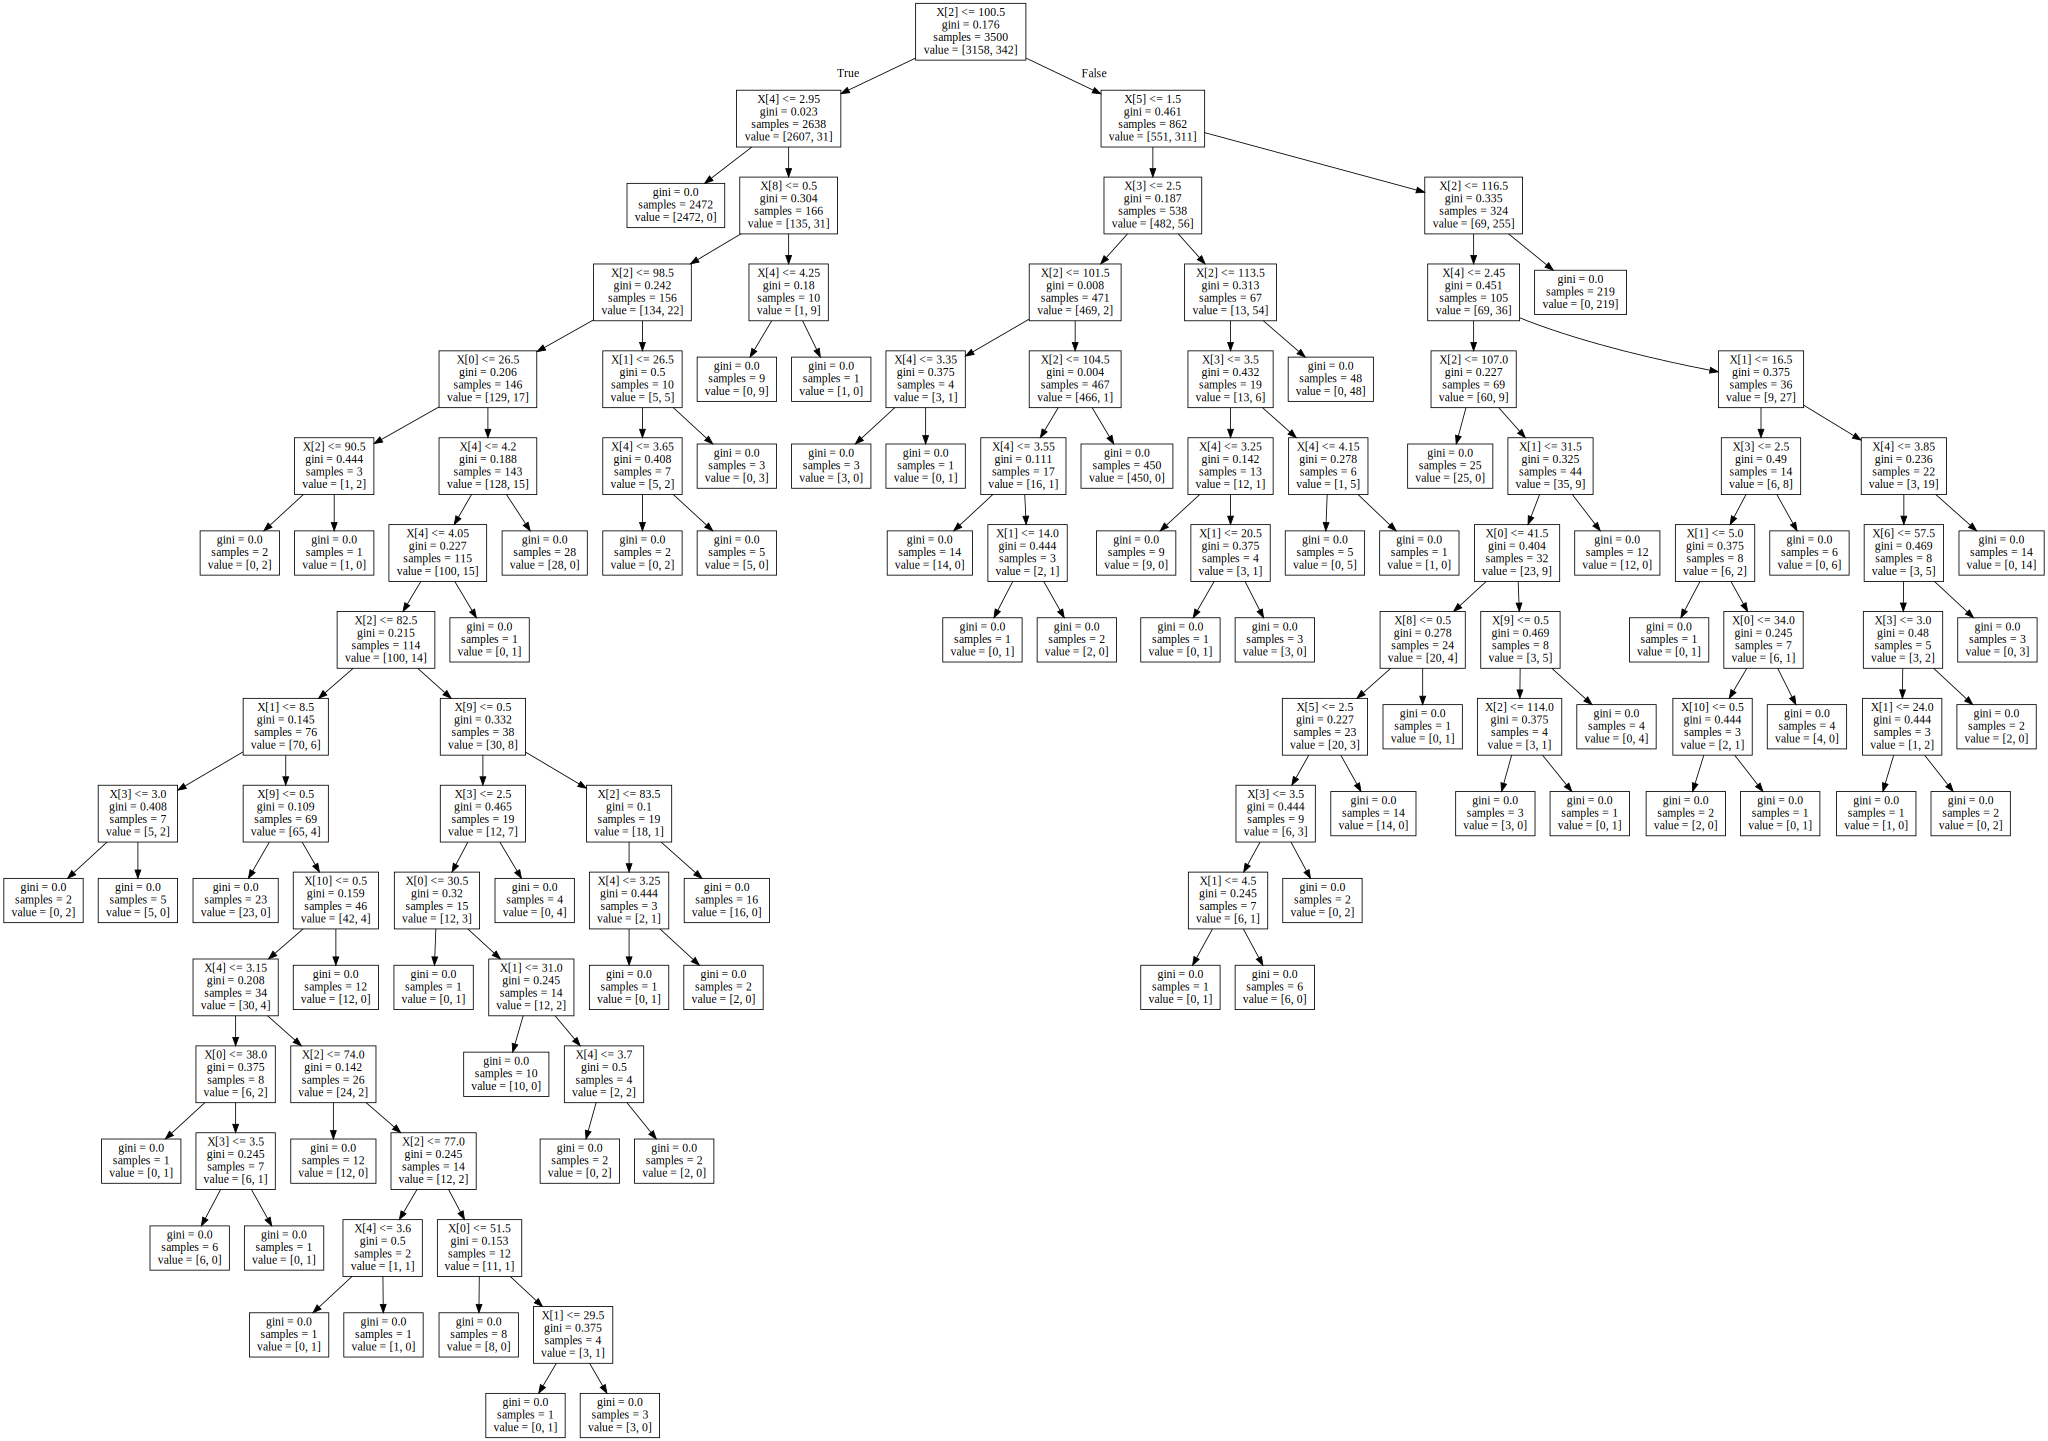

In [59]:
graph = graphviz.Source(dt_data) 
graph

#RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
n_est = [25,50,75,100,125]
max_depth = [None,3,4,5,6]
acc = []
for i in n_est:
    for k in max_depth:
        rbf_clf = RandomForestClassifier(n_estimators=i,max_depth=k)
        rbf_clf.fit(X_train, Y_train)
        Y_pred = rbf_clf.predict(X_test)
        print(rbf_clf.score(X_test, Y_test),f1_score(Y_test,Y_pred), "N_est = " +str(i),"max_depth = " +str(k))

0.9886666666666667 0.9368029739776952 N_est = 25 max_depth = None
0.9606666666666667 0.730593607305936 N_est = 25 max_depth = 3
0.9793333333333333 0.8734693877551021 N_est = 25 max_depth = 4
0.984 0.9069767441860466 N_est = 25 max_depth = 5
0.982 0.8957528957528957 N_est = 25 max_depth = 6
0.9886666666666667 0.9368029739776952 N_est = 50 max_depth = None
0.9573333333333334 0.7009345794392524 N_est = 50 max_depth = 3
0.972 0.8220338983050847 N_est = 50 max_depth = 4
0.9833333333333333 0.9034749034749036 N_est = 50 max_depth = 5
0.9853333333333333 0.9166666666666666 N_est = 50 max_depth = 6
0.986 0.9207547169811321 N_est = 75 max_depth = None
0.9433333333333334 0.5595854922279793 N_est = 75 max_depth = 3
0.964 0.7589285714285714 N_est = 75 max_depth = 4
0.9793333333333333 0.8774703557312253 N_est = 75 max_depth = 5
0.9846666666666667 0.9118773946360155 N_est = 75 max_depth = 6
0.9866666666666667 0.9259259259259259 N_est = 100 max_depth = None
0.944 0.5670103092783505 N_est = 100 max_dept

In [38]:
rbf_clf = RandomForestClassifier(n_estimators=100,max_depth = None)
rbf_clf.fit(X_train, Y_train)
Y_pred = rbf_clf.predict(X_test)
print(rbf_clf.score(X_test, Y_test),f1_score(Y_test,Y_pred))

0.9906666666666667 0.9477611940298507


# Best F1 Score 94 % Accuracy 99
Since the accuracy varies a lot so let us boost it to its maximum accuracy.(I'll use XGBoost)

In [39]:
import pickle
pickle.dump(rbf_clf,open("rbf_clf.pkl","wb"))

In [40]:
rbf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

[[1359    3]
 [  11  127]]


0.9477611940298507

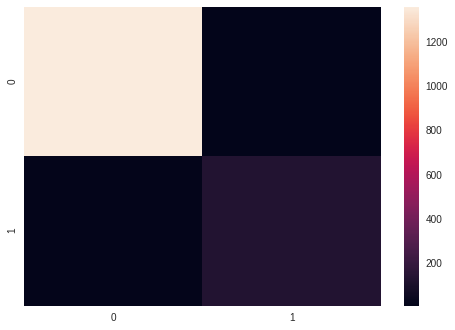

In [41]:
Y_pred = rbf_clf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred))
f1_score(Y_test,Y_pred)

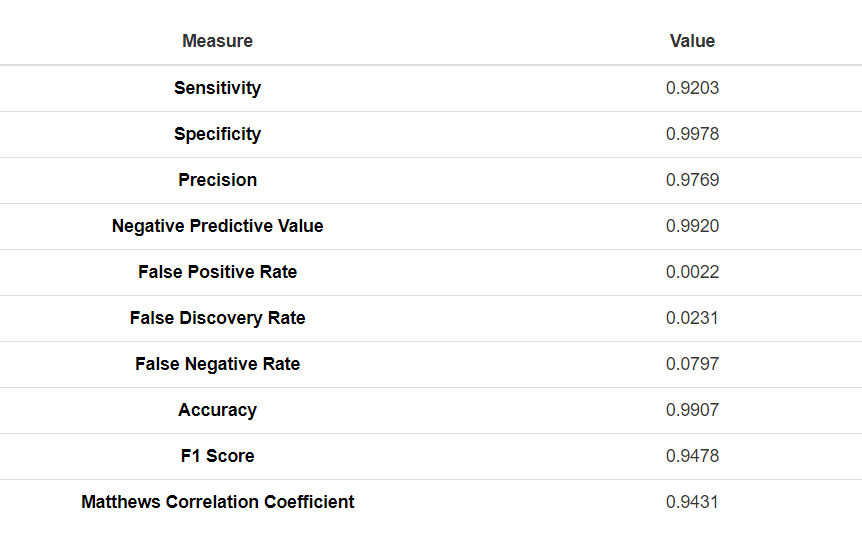

In [42]:
X_train.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [43]:
# data.groupby(['Loan_Status', 'Gender', 'Property_Area'])['Married'].value_counts()
# from yellowbrick.classifier import ClassificationReport
# viz = ClassificationReport(LR_model)
# viz.fit(XT, YT)
# viz.score(Xt, Yt)
# viz.show()  
# import statsmodels.api as sm
# X2 = sm.add_constant(XT)
# regressor2 = sm.Logit(YT, X2).fit()
# print("p-Values for each column: ")
# print()
# print(regressor2.pvalues)

In [68]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=3,n_estimators=100)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
print(model.score(X_test,Y_test),model.score(X_train,Y_train))

0.9893333333333333 0.9908571428571429


In [70]:
Y_pred = model.predict(X_test)

[[1357    5]
 [  11  127]]


0.9407407407407408

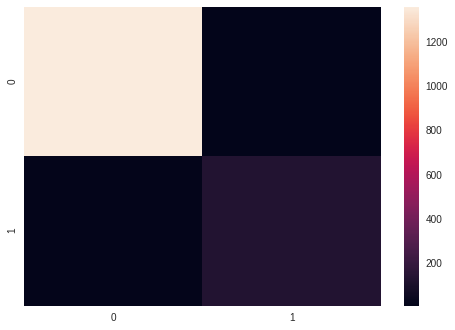

In [47]:
print(confusion_matrix(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred))
f1_score(Y_test,Y_pred)

In [65]:
pickle.dump(model,open("xgb.pkl","wb"))

# Feature Importance in prediction

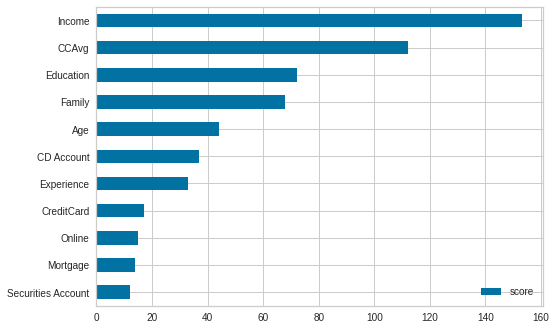

In [72]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh')